Bharat Nandan Bodala.  github- @mlgfamlmao


PROBLEM CASE -  predict price value of a car based on a set of features.

features- {
dateCrawled: Date the car was crawled. (Date)
name: Name of the car. (String)
seller: Type of seller (private or dealer). (String)
offerType: Type of offer (e.g. sale, repair, etc.). (String)
price: Price of the car. (Integer)
abtest: Test type (A or B). (String)
vehicleType: Type of vehicle (e.g. SUV, sedan, etc.). (String)
yearOfRegistration: Year the car was registered. (Integer)
gearbox: Type of gearbox (manual or automatic). (String)
powerPS: Power of the car in PS. (Integer)
model: Model of the car. (String)
kilometer: Kilometers the car has been driven. (Integer)
monthOfRegistration: Month the car was registered. (Integer)
fuelType: Type of fuel (e.g. diesel, petrol, etc.). (String)
brand: Brand of the car. (String)
notRepairedDamage: Whether or not the car has any damage that has not been repaired. (String)
dateCreated: Date the car was created. (Date)
nrOfPictures: Number of pictures of the car. (Integer)
postalCode: Postal code of the car. (Integer)
lastSeen: Date the car was last seen. (Date)
}

Approach:
        -My initial approach was to clean up data (dropped some useless columns such as index etc and removed outlier values.) , and then, I generated correlation matrices and pyplots. 
        -Many of the features were deemed useless by observation except powerPS.
        -Before proceeding to build a model on one feature, I tried to perform 3 bit encoding to vehicleType and binary encoding to gearbox, but again, the data is not good and no type of meaningful polynomial relation is to be found. 
        -Either ways, I have decided to train a model based on one feature powerPS.
        -Initial chosen hyperparameters: epochs= 50, learning_rate= 0.001, batch_size= 500.
        -Used a 1 density keras model with gradient descent approach. Used mean squared error loss as convergence metric.
        -Since aforementioned keras model has some unexpected bugs, scikit SGD regressor was used. It provided poor results

Conclusion:
        Poor data. 

In [1]:
import pandas as pd
import tensorflow
import numpy as np
import keras
import seaborn as sns
import kagglehub
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
import joblib

C:\Users\bhara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset= pd.read_csv("autos.csv")
dataset["gearbox"]= dataset["gearbox"].apply(lambda x : 1 if x=="automatik" else 0)
cleaned = dataset.drop(['index'], axis=1)
print(cleaned.head(200))
print("--")
cleaned["price"]= cleaned["price"]/100000
print(cleaned['vehicleType'].unique().tolist())

             dateCrawled                                name  seller  \
0    2016-03-24 11:52:17                          Golf_3_1.6  privat   
1    2016-03-24 10:58:45                A5_Sportback_2.7_Tdi  privat   
2    2016-03-14 12:52:21      Jeep_Grand_Cherokee_"Overland"  privat   
3    2016-03-17 16:54:04                  GOLF_4_1_4__3TÜRER  privat   
4    2016-03-31 17:25:20      Skoda_Fabia_1.4_TDI_PD_Classic  privat   
..                   ...                                 ...     ...   
195  2016-03-25 15:56:48       Volkswagen_Golf_Plus_1.6_Goal  privat   
196  2016-03-08 21:52:34     Volkswagen_Golf_R32_4Motion_DSG  privat   
197  2016-04-03 11:44:17                     Golf_1_6_Family  privat   
198  2016-03-21 20:43:01       Hyundai_Getz_1.5_CRDi_VGT_GLS  privat   
199  2016-03-27 12:47:45  VW_Polo_Coupe_86c_1990Bj._125193km  privat   

    offerType  price   abtest vehicleType  yearOfRegistration  gearbox  \
0     Angebot    480     test         NaN                1993

<Axes: xlabel='vehicleType', ylabel='price'>

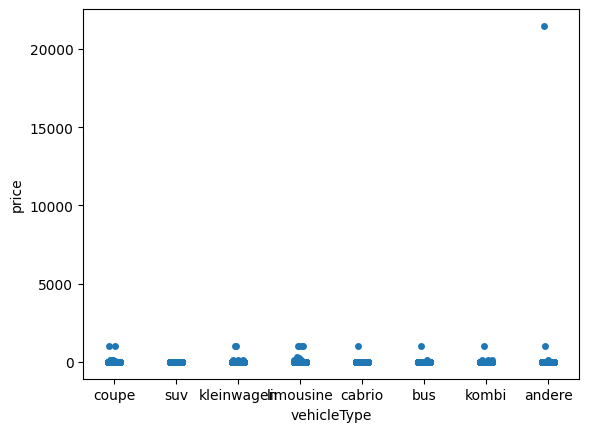

In [3]:
sns.stripplot(x='vehicleType', y='price', data=cleaned)
#too much similarity between vehicleType and prices



<Axes: xlabel='model', ylabel='price'>

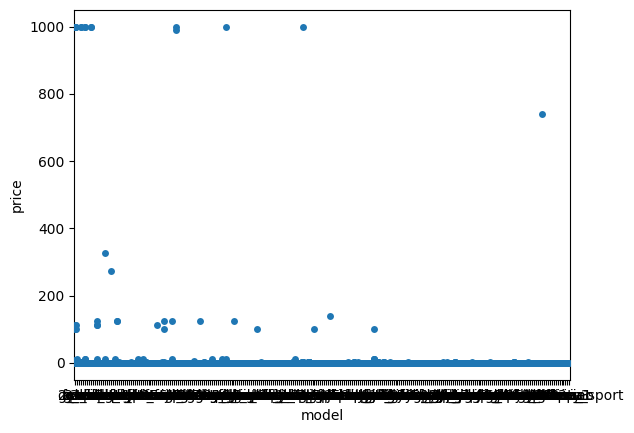

In [4]:
sns.stripplot(x='model', y = 'price', data = cleaned)
#too much similarity between model types and prices

In [5]:
def vehicleEncoding():
    #Assign each vehicleType to a 3 bit binary number (000,001 etc)
    #Idea scrapped as doing this may not be beneficial at all based on aforementioned reasons.
    return



In [6]:
print(cleaned.describe())
cleaned.corr(numeric_only= True)


               price  yearOfRegistration        gearbox        powerPS  \
count  371528.000000       371528.000000  371528.000000  371528.000000   
mean        0.172951         2004.577997       0.207535     115.549477   
std        35.879537           92.866598       0.405542     192.139578   
min         0.000000         1000.000000       0.000000       0.000000   
25%         0.011500         1999.000000       0.000000      70.000000   
50%         0.029500         2003.000000       0.000000     105.000000   
75%         0.072000         2008.000000       0.000000     150.000000   
max     21474.836470         9999.000000       1.000000   20000.000000   

           kilometer  monthOfRegistration  nrOfPictures    postalCode  
count  371528.000000        371528.000000      371528.0  371528.00000  
mean   125618.688228             5.734445           0.0   50820.66764  
std     40112.337051             3.712412           0.0   25799.08247  
min      5000.000000             0.000000    

,price,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
price,1.000000,-0.000182,-0.000306,0.006850,-0.000635,-0.002826,NaN,-0.003164
yearOfRegistration,-0.000182,1.000000,0.002108,0.000351,-0.055319,-0.011607,NaN,-0.001652
gearbox,-0.000306,0.002108,1.000000,0.149427,-0.038602,0.056415,NaN,-0.018422
powerPS,0.006850,0.000351,0.149427,1.000000,-0.010738,0.044358,NaN,0.027113
kilometer,-0.000635,-0.055319,-0.038602,-0.010738,1.000000,0.001838,NaN,-0.026694
monthOfRegistration,-0.002826,-0.011607,0.056415,0.044358,0.001838,1.000000,NaN,0.014963
nrOfPictures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
postalCode,-0.003164,-0.001652,-0.018422,0.027113,-0.026694,0.014963,NaN,1.000000


In [7]:
X = cleaned.drop(["price"],axis=1)
y= cleaned["price"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
print(y_train)

70153     0.05500
135557    0.02000
46479     0.00000
51079     0.00890
185913    0.02000
           ...   
259178    0.12500
365838    0.03800
131932    0.00001
146867    0.02850
121958    0.14900
Name: price, Length: 260069, dtype: float64


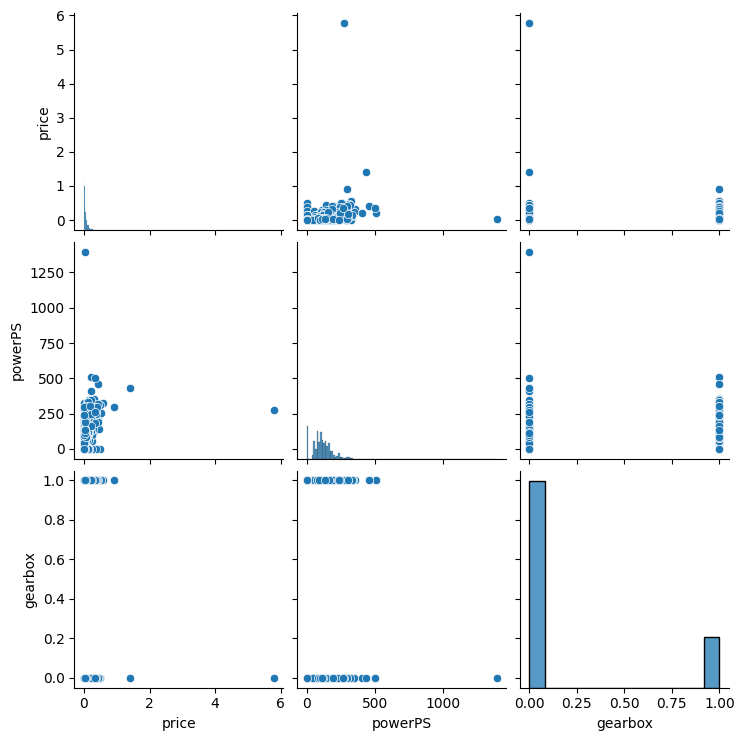

In [8]:
sns.pairplot(cleaned.head(2000),x_vars=["price","powerPS","gearbox"],y_vars=["price","powerPS","gearbox"])

In [9]:
#This method is bringing some errors which i cannot debug; used scikit insetad (next code block).
def build_model(learning_rate,num_features):
  inputs= keras.Input(shape = (num_features,))
  output = keras.layers.Dense(units= 1)(inputs)
  model = keras.Model(inputs= inputs, outputs= output)

  #compile the model
  print("Model metrics:", model.metrics_names)

  model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=learning_rate),
                loss="mean_squared_error",
                metrics=[keras.metrics.RootMeanSquaredError()])

  return model

def train_model(model, features, label, epochs, batch_size):



  history = model.fit(x=features,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)


  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  epochs = history.epoch



  hist = pd.DataFrame(history.history)


  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

def visuaize():
  return

In [10]:
learning_rate= 0.001
batch_size= 50
epochs= 50
features= ['powerPS']
feature_values = X_train.loc[:, features] 
label = "price"
#model = build_model(learning_rate, len(features)) cannot debug??
model = SGDRegressor(alpha=0.01, learning_rate='constant', eta0=learning_rate,
                     loss='epsilon_insensitive', max_iter=epochs, n_iter_no_change=20, penalty='l2')
model.fit(X_train[features], y_train)

trained_weight = model.coef_
trained_bias = model.intercept_
trained_epochs = model.n_iter_
# rmse calculation is not done yet, you need to compute it manually
from sklearn.metrics import mean_squared_error
import numpy as np
rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train[features])))

print("Weights:", trained_weight)
print("Bias:", trained_bias)
print("Epochs:", trained_epochs)
print("Final RMSE:", rmse)

joblib.dump(model, 'FinalUsedCarsModel.pkl')


#Not going to test on test data. Credit to this decision goes to the poor RMSE value.
#Conclusion: poor data.





Weights: [0.00351195]
Bias: [0.083]
Epochs: 38
Final RMSE: 42.69670179589195


['FinalUsedCarsModel.pkl']